# Random Graphs: Second Team Homework

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#import itertools
import logging
logging.captureWarnings(True) # Logging warnings in order to suppress them

## Exercise 1
Write a function that computes the second smallest eigenvalue λ_1 of the unweighted normalized graph Laplacian for a given graph with n vertices. 

Then write a script that uses the assigned dateset, and computes the sequence of second smallest eigenvalue λ_1(k) of the cumulative graph Edges(1 : k, 1 : 2), where 1 ≤ k ≤ m denotes the running number of edges. 

Specifically, order the edges according to their weights from file \*weight.txt, starting with the largest weight first and then continue in a monotonic decreasing order.

In [17]:
# Load data
file_location = "../data/sgb128Nodes41to80_adj20.txt" 
adj_matrix = np.genfromtxt(file_location, delimiter=' ', skip_header = 1)
graph = nx.Graph(adj_matrix)

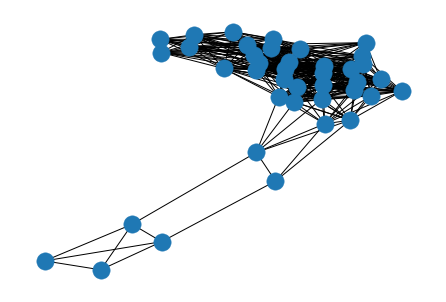

In [18]:
nx.draw(graph)

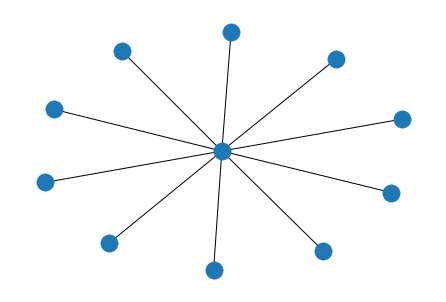

In [19]:
# Testing the subgraph generation
graph_from_first_n_edges = lambda G, n: nx.from_edgelist(list(graph.edges)[:n])
subgraph = graph_from_first_n_edges(graph, 10)
nx.draw(subgraph)

In [20]:
def second_smallest_eigenvalue_of_normalized_laplacian(G):
    subgraph_laplacian = nx.normalized_laplacian_matrix(G).todense()
    eigenvalues = np.linalg.eigvals(subgraph_laplacian)
    return sorted(eigenvalues)[1]
    
second_smallest_eigenvalue_of_normalized_laplacian(subgraph)

0.9999999999999998

In [21]:
# Compute the second smallest eigenvalue of the cumulative graph Edges(1 : k, 1 : 2), 
# where 1 ≤ k ≤ m is the running number of edges
second_smallest_eigenvals = \
    [second_smallest_eigenvalue_of_normalized_laplacian(graph_from_first_n_edges(graph, n)) \
     for n in range(1,graph.number_of_edges()+1)]

In [22]:
for i in range(0,len(second_smallest_eigenvals),20): 
    print(f"graph from first {i} edges:\t lambda_1 of normalized laplacian is {second_smallest_eigenvals[i]}")

graph from first 0 edges:	 lambda_1 of normalized laplacian is 2.0
graph from first 20 edges:	 lambda_1 of normalized laplacian is 0.9999999999999987
graph from first 40 edges:	 lambda_1 of normalized laplacian is (0.5879722382640602+0j)
graph from first 60 edges:	 lambda_1 of normalized laplacian is 0.47672977847337217
graph from first 80 edges:	 lambda_1 of normalized laplacian is 0.19531860379318222
graph from first 100 edges:	 lambda_1 of normalized laplacian is 0.23773030361515216
graph from first 120 edges:	 lambda_1 of normalized laplacian is (0.24114618734321286+0j)
graph from first 140 edges:	 lambda_1 of normalized laplacian is 0.23549853759940867
graph from first 160 edges:	 lambda_1 of normalized laplacian is 0.2787147864755762
graph from first 180 edges:	 lambda_1 of normalized laplacian is 0.2883243006621653
graph from first 200 edges:	 lambda_1 of normalized laplacian is 0.3003937369081605
graph from first 220 edges:	 lambda_1 of normalized laplacian is 0.304702932306293

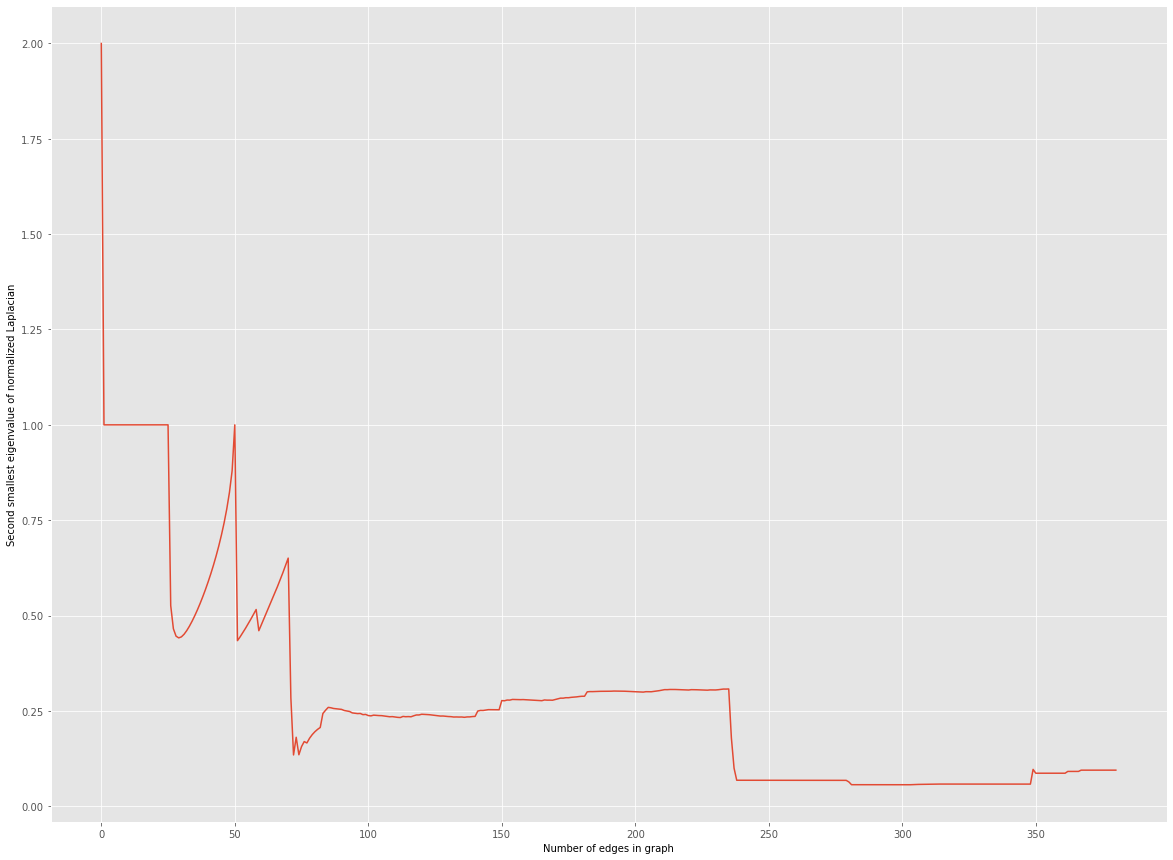

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(20,15))
plt.plot(second_smallest_eigenvals)
plt.xlabel("Number of edges in graph")
plt.ylabel("Second smallest eigenvalue of normalized Laplacian")
pass # To hide output of last run command

## Exercise 2

### Question 1

In [24]:
weight_matrix = np.array(\
# 1  2  3  4  5  6
[[0, 4, 1, 0, 0, 3], # 1
 [4, 0, 2, 0, 0, 1], # 2
 [1, 2, 0, 2, 1, 0], # 3
 [0, 0, 2, 0, 4, 1], # 4
 [0, 0, 1, 4, 0, 2], # 5
 [3, 1, 0, 1, 2, 0]  # 6
])
print(weight_matrix)
# Check if matrix is symmetric, to validate  
# that weights are entered correctly
print(f"Matrix symmetric? {np.allclose(weight_matrix, weight_matrix.T)}") 

[[0 4 1 0 0 3]
 [4 0 2 0 0 1]
 [1 2 0 2 1 0]
 [0 0 2 0 4 1]
 [0 0 1 4 0 2]
 [3 1 0 1 2 0]]
Matrix symmetric? True


In [25]:
G = nx.Graph(weight_matrix)
laplacian = nx.laplacian_matrix(G).todense()
normalized_laplacian = nx.normalized_laplacian_matrix(G).todense()
eigenvalues, eigenvectors = np.linalg.eig(normalized_laplacian)

print("Laplacian matrix:", laplacian, "",
      "Normalized Laplacian matrix:", normalized_laplacian, "", 
      "Eigenvalues:", eigenvalues, "",
      "Eigenvectors:", eigenvectors,
      sep="\n")

Laplacian matrix:
[[ 8 -4 -1  0  0 -3]
 [-4  7 -2  0  0 -1]
 [-1 -2  6 -2 -1  0]
 [ 0  0 -2  7 -4 -1]
 [ 0  0 -1 -4  7 -2]
 [-3 -1  0 -1 -2  7]]

Normalized Laplacian matrix:
[[ 1.         -0.53452248 -0.14433757  0.          0.         -0.40089186]
 [-0.53452248  1.         -0.3086067   0.          0.         -0.14285714]
 [-0.14433757 -0.3086067   1.         -0.3086067  -0.15430335  0.        ]
 [ 0.          0.         -0.3086067   1.         -0.57142857 -0.14285714]
 [ 0.          0.         -0.15430335 -0.57142857  1.         -0.28571429]
 [-0.40089186 -0.14285714  0.         -0.14285714 -0.28571429  1.        ]]

Eigenvalues:
[0.         0.44155271 0.90153939 1.65607672 1.56455746 1.43627373]

Eigenvectors:
[[ 0.43643578  0.49216179 -0.16377551 -0.52035065 -0.5077644  -0.10903523]
 [ 0.40824829  0.46680562  0.27052617  0.43313913  0.37207392 -0.46496552]
 [ 0.37796447 -0.0443707   0.66668519 -0.1756971   0.11694114  0.60511177]
 [ 0.40824829 -0.52354613  0.10926966  0.4190177  -0

### Question 2

In [26]:
from itertools import chain, combinations

def subsets(nodes):
    """Given list of nodes, generate all subsets of nodes which have length between 1 and len(nodes)/2."""
    return list(chain.from_iterable(combinations(nodes, r) for r in range(1,(len(nodes)//2)+1)))
def cut_complement(G, nodes): return G.nodes - nodes
def cheeger_criterion(G, A): return len(list(nx.edge_boundary(G,A))) / min(len(A), len(cut_complement(G,A)))

def cheeger_number_partition(G):
    G_subsets = subsets(G.nodes)
    cheeger_ratios = [cheeger_criterion(G,A) for A in G_subsets]
    cheeger_number = min(cheeger_ratios)
    cheeger_partition = G_subsets[cheeger_ratios.index(cheeger_number)]
    return cheeger_number, cheeger_partition

cheeger_number, cheeger_partition = cheeger_number_partition(G)
print("Cheeger number:", cheeger_number)
print("Partition associated with Cheeger number:", cheeger_partition)

Cheeger number: 1.3333333333333333
Partition associated with Cheeger number: (0, 1, 2)


### Question 3

In [27]:
initialization = [v for v, g in zip(G.nodes,eigenvectors[1]) if g >= 0]
print("Initialization:", initialization)
initialization_cheeger = cheeger_criterion(G, initialization)
print("Associated Cheeger criterion value:", initialization_cheeger, 
     "\nversus actual value of", cheeger_number)

Initialization: [0, 1, 2, 3, 4]
Associated Cheeger criterion value: 4.0 
versus actual value of 1.3333333333333333
